In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import numpy as np
import warnings
from pandas.api.types import is_numeric_dtype
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from collections import OrderedDict
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import scipy.stats as stats
import statsmodels.api as sm
import json
import requests

warnings.filterwarnings('ignore')

In [8]:
import importlib
import sys
import os
parent_dir = os.path.dirname(os.path.dirname(os.path.abspath('')))

print(parent_dir)
sys.path.insert(0,parent_dir)
import data_manipulation.data_transform as dat

importlib.reload(dat)

/home/cody/Documents/DataSciBC/EPLTransfer


<module 'data_manipulation.data_transform' from '/home/cody/Documents/DataSciBC/EPLTransfer/data_manipulation/data_transform.py'>

In [9]:
main_data_path = "../../data/main_data/train/train.csv"
train = pd.read_csv(main_data_path)
train_drop = dat.transformer(train,EDA=False).data

In [10]:
train_drop.head()


,name,height,market_value,adjusted_market_value,team,league,minutesPlayed,totalLongBalls,keyPass,totalPass,...,xGChain,xGBuildup,age,pos_D,pos_F,pos_G,pos_M,foot_both,foot_left,foot_right
0,noah mbamba,187.0,14.914123,14.914123,Bayer 04 Leverkusen,Bundesliga,613,21,4,330,...,0.000000,0.000000,19.0,True,False,False,False,False,False,True
1,zachary duncan,183.0,12.611541,12.815613,AGF,Superligaen,956,41,7,332,...,0.000000,0.000000,21.0,False,False,False,True,False,False,True
2,manuel neuer,193.0,15.201805,15.201805,FC Bayern München,Bundesliga,20059,2421,2,7617,...,0.271096,0.270107,38.0,False,False,True,False,False,False,True
3,mickel miller,173.0,12.429220,12.429220,Plymouth Argyle,Championship,2290,89,29,809,...,0.000000,0.000000,28.0,False,False,False,True,False,True,False
4,gaetano monachello,185.0,13.710151,13.991030,Atalanta,Serie A,355,5,0,70,...,0.161218,0.061587,22.0,False,True,False,False,False,True,False


In [11]:
train_drop

,name,height,market_value,adjusted_market_value,team,league,minutesPlayed,totalLongBalls,keyPass,totalPass,...,xGChain,xGBuildup,age,pos_D,pos_F,pos_G,pos_M,foot_both,foot_left,foot_right
0,noah mbamba,187.0,14.914123,14.914123,Bayer 04 Leverkusen,Bundesliga,613,21,4,330,...,0.000000,0.000000,19.0,True,False,False,False,False,False,True
1,zachary duncan,183.0,12.611541,12.815613,AGF,Superligaen,956,41,7,332,...,0.000000,0.000000,21.0,False,False,False,True,False,False,True
2,manuel neuer,193.0,15.201805,15.201805,FC Bayern München,Bundesliga,20059,2421,2,7617,...,0.271096,0.270107,38.0,False,False,True,False,False,False,True
3,mickel miller,173.0,12.429220,12.429220,Plymouth Argyle,Championship,2290,89,29,809,...,0.000000,0.000000,28.0,False,False,False,True,False,True,False
4,gaetano monachello,185.0,13.710151,13.991030,Atalanta,Serie A,355,5,0,70,...,0.161218,0.061587,22.0,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,michael svoboda,195.0,14.220976,14.220976,Venezia,Serie A,1886,141,3,941,...,0.117319,0.117319,26.0,True,False,False,False,False,False,True
9363,kalifa coulibaly,197.0,14.220976,14.370794,Nantes,Ligue 1,5669,28,59,1327,...,0.265225,0.053416,30.0,False,True,False,False,False,False,True
9364,nordin jackers,185.0,13.710151,13.710151,Club Brugge KV,"First Division A, Championship Round",3140,766,1,1134,...,0.000000,0.000000,26.0,False,False,True,False,False,False,True
9365,mads kikkenborg,197.0,13.592368,13.647174,Lyngby,Superligaen,3870,905,4,1320,...,0.000000,0.000000,24.0,False,False,True,False,False,False,True


In [12]:
train_drop.columns

Index(['name', 'height', 'market_value', 'adjusted_market_value', 'team',
       'league', 'minutesPlayed', 'totalLongBalls', 'keyPass', 'totalPass',
       'totalCross', 'goalAssist', 'savedShotsFromInsideTheBox', 'saves',
       'totalKeeperSweeper', 'goalsPrevented', 'touches', 'possessionLostCtrl',
       'dispossessed', 'aerialLost', 'aerialWon', 'duelLost', 'duelWon',
       'challengeLost', 'outfielderBlock', 'totalContest', 'interceptionWon',
       'wonContest', 'totalTackle', 'totalClearance', 'blockedScoringAttempt',
       'hitWoodwork', 'bigChanceCreated', 'bigChanceMissed', 'shotOffTarget',
       'onTargetScoringAttempt', 'goals', 'wasFouled', 'fouls', 'totalOffside',
       'yellow_card', 'red_card', 'rating', 'accuratePass',
       'accurateLongBalls', 'accurateCross', 'accurateKeeperSweeper',
       'expectedAssists', 'expectedGoals', 'xGChain', 'xGBuildup', 'age',
       'pos_D', 'pos_F', 'pos_G', 'pos_M', 'foot_both', 'foot_left',
       'foot_right'],
      dtype='

In [63]:
features = ['height', 'minutesPlayed', 'totalLongBalls', 'keyPass',
       'totalPass', 'totalCross', 'goalAssist', 'savedShotsFromInsideTheBox',
       'saves', 'totalKeeperSweeper', 'goalsPrevented', 'touches',
       'possessionLostCtrl', 'dispossessed', 'aerialLost', 'aerialWon',
       'duelLost', 'duelWon', 'challengeLost', 'outfielderBlock',
       'totalContest', 'interceptionWon', 'wonContest', 'totalTackle',
       'totalClearance', 'blockedScoringAttempt', 'hitWoodwork',
       'bigChanceCreated', 'bigChanceMissed', 'shotOffTarget',
       'onTargetScoringAttempt', 'goals', 'wasFouled', 'fouls', 'totalOffside',
       'yellow_card', 'red_card', 'rating', 'accuratePass',
       'accurateLongBalls', 'accurateCross', 'accurateKeeperSweeper',
       'expectedAssists', 'expectedGoals', 'xGChain', 'xGBuildup', 'age',
       'pos_D', 'pos_F', 'pos_G', 'pos_M', 'foot_both', 'foot_left',
       'foot_right']
target = 'adjusted_market_value'


In [14]:
# Baseline Linear Regression with this data:
reg = LinearRegression()
reg.fit(train_drop[features],train_drop[target])


LinearRegression()

In [42]:
y_true = train_drop[target]
y_pred = reg.predict(train_drop[features])
residuals = y_true - y_pred
mse = mean_squared_error(y_true,y_pred)
r2 = r2_score(y_true,y_pred)
mae = mean_absolute_error(y_true,y_pred)
mape = mean_absolute_percentage_error(y_true,y_pred)
print(f'MSE = {mse}')
print(f'R^2: {r2}')
print(f'MAE = {mae}')
print(f'MAPE = {mape}')

MSE = 0.972262510178526
R^2: 0.49792048485510076
MAE = 0.7718530378582142
MAPE = 0.05557003422343156


In [64]:
# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42,)
X = train_drop[features]
y = train_drop[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = LinearRegression()

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(y_train,y_train_pred))
    test_mses.append(mean_squared_error(y_val,y_test_pred))

    train_rmses.append(root_mean_squared_error(y_train,y_train_pred))
    test_rmses.append(root_mean_squared_error(y_val,y_test_pred))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')    



MSE for train: mean: 0.9712730274630073 std: 0.006365150004883216
MSE for test:  mean: 0.9917936620578616  std: 0.05629059099247783

RMSE for train: mean: 0.9855265541516396 std: 0.0032308706261024818
RMSE for test: mean: 0.9954904157946565 std: 0.02815127206439656

R^2 for train: mean: 0.49841806791567567 std: 0.0034807946881530312
R^2 for test: mean: 0.4865796403624909 std: 0.033712047917298836

MAE for train: mean: 0.771497179270493 std: 0.002252085657498003
MAE for test: mean: 0.7779834942393637 std: 0.01958098835939973

MAPE for train: mean: 0.05554498070062096 std: 0.000186237733910337
MAPE for test: mean: 0.055990901418880204 std: 0.0016454099713590893



In [17]:
# Lets look at the features and see which ones are statistical significant for the target variable

X = train_drop[features]
X[['pos_D', 'pos_F', 'pos_G', 'pos_M', 'foot_both', 'foot_left',
       'foot_right']] = X[['pos_D', 'pos_F', 'pos_G', 'pos_M', 'foot_both', 'foot_left',
       'foot_right']]*1
y = train_drop[target]
X = sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()
display(results.summary())
p_values = results.pvalues
significant_features = p_values[p_values<0.05].index[1:]
print(significant_features)

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     adjusted_market_value   R-squared:                       0.498
Model:                               OLS   Adj. R-squared:                  0.495
Method:                    Least Squares   F-statistic:                     177.6
Date:                   Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                           20:39:22   Log-Likelihood:                -13159.
No. Observations:                   9367   AIC:                         2.642e+04
Df Residuals:                       9314   BIC:                         2.680e+04
Df Model:                             52                                         
Covariance Type:               nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          8.6049      0.230     37.483      0.000       8.155       9.055
height                         0.0044      0.002      2.263      0.024       0.001       0.008
minutesPlayed                  0.0001   1.67e-05      7.162      0.000    8.71e-05       0.000
totalLongBalls                -0.0006   9.74e-05     -5.968      0.000      -0.001      -0.000
keyPass                       -0.0023      0.001     -2.742      0.006      -0.004      -0.001
totalPass                      0.0001   6.87e-05      1.840      0.066   -8.26e-06       0.000
totalCross                    -0.0008      0.000     -3.763      0.000      -0.001      -0.000
goalAssist                     0.0078      0.005      1.426      0.154      -0.003       0.019
savedShotsFromInsideTheBox     0.0023      0.004      0.519      0.603      -0.006       0.011
saves                          0.0011      0.003      0.385      0.700      -0.004       0.007
totalKeeperSweeper             0.0055      0.003      1.904      0.057      -0.000       0.011
goalsPrevented                 0.0227      0.010      2.179      0.029       0.002       0.043
touches                       -0.0002    6.7e-05     -3.341      0.001      -0.000   -9.26e-05
possessionLostCtrl             0.0007   7.03e-05      9.348      0.000       0.001       0.001
dispossessed                  -0.0051      0.003     -1.612      0.107      -0.011       0.001
aerialLost                    -0.0037      0.003     -1.184      0.236      -0.010       0.002
aerialWon                     -0.0243      0.005     -5.393      0.000      -0.033      -0.015
duelLost                       0.0030      0.003      0.955      0.339      -0.003       0.009
duelWon                        0.0245      0.005      5.374      0.000       0.016       0.033
challengeLost                 -0.0080      0.003     -2.440      0.015      -0.014      -0.002
outfielderBlock                0.0021      0.001      1.523      0.128      -0.001       0.005
totalContest                6.291e-05      0.003      0.019      0.985      -0.006       0.006
interceptionWon               -0.0023      0.001     -4.616      0.000      -0.003      -0.001
wonContest                    -0.0243      0.006     -4.003      0.000      -0.036      -0.012
totalTackle                   -0.0210      0.005     -4.571      0.000      -0.030      -0.012
totalClearance                 0.0002      0.000      0.704      0.481      -0.000       0.001
blockedScoringAttempt          0.0041      0.002      2.402      0.016       0.001       0.007
hitWoodwork                   -0.0185      0.008     -2.210      0.027      -0.035      -0.002
bigChanceCreated              -0.0014      0.004     -0.387      0.699      -0.009       0.006
bigChanceM

Index(['height', 'minutesPlayed', 'totalLongBalls', 'keyPass', 'totalCross',
       'goalsPrevented', 'touches', 'possessionLostCtrl', 'aerialWon',
       'duelWon', 'challengeLost', 'interceptionWon', 'wonContest',
       'totalTackle', 'blockedScoringAttempt', 'hitWoodwork', 'shotOffTarget',
       'wasFouled', 'totalOffside', 'accuratePass', 'accurateLongBalls',
       'accurateCross', 'expectedAssists', 'expectedGoals', 'xGBuildup', 'age',
       'pos_D', 'pos_F', 'pos_G', 'pos_M', 'foot_both', 'foot_left',
       'foot_right'],
      dtype='object')


In [18]:
# Training on just the significant features gets us about the same performance in training.
reg_sign = LinearRegression()
reg_sign.fit(train_drop[significant_features],train_drop[target])
y_true_sign = train_drop[target]
y_pred_sign = reg_sign.predict(train_drop[significant_features])
residuals_sign = y_true_sign - y_pred_sign
mse = mean_squared_error(y_true_sign,y_pred_sign)
r2 = r2_score(y_true_sign,y_pred_sign)
mae = mean_absolute_error(y_true_sign,y_pred_sign)
mape = mean_absolute_percentage_error(y_true_sign,y_pred_sign)
print(f'MSE = {mse}')
print(f'R^2: {r2}')
print(f'MAE = {mae}')
print(f'MAPE = {mape}')

MSE = 0.9824005983282215
R^2: 0.4926851432375775
MAE = 0.7749336448556897
MAPE = 0.05578582048589889


In [19]:
# Lasso
# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42)
X = train_drop[features]
y = train_drop[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = Pipeline([('scale',StandardScaler()),('lasso',Lasso(alpha=1))])

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(y_train,y_train_pred))
    test_mses.append(mean_squared_error(y_val,y_test_pred))

    train_rmses.append(root_mean_squared_error(y_train,y_train_pred))
    test_rmses.append(root_mean_squared_error(y_val,y_test_pred))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')   

MSE for train: mean: 1.9364423666407866 std: 0.008266983322047287
MSE for test:  mean: 1.9370070505871033  std: 0.07418729161914511

RMSE for train: mean: 1.3915579553549653 std: 0.0029704425755596726
RMSE for test: mean: 1.3915086399933971 std: 0.026659996452175136

R^2 for train: mean: 0.0 std: 0.0
R^2 for test: mean: -0.0015352803532839633 std: 0.002499308752458412

MAE for train: mean: 1.108441135470317 std: 0.002591382072939238
MAE for test: mean: 1.108554940297475 std: 0.021375443419925467

MAPE for train: mean: 0.07906009060754703 std: 0.00017082181972296562
MAPE for test: mean: 0.07906854831880969 std: 0.0015352060645572856



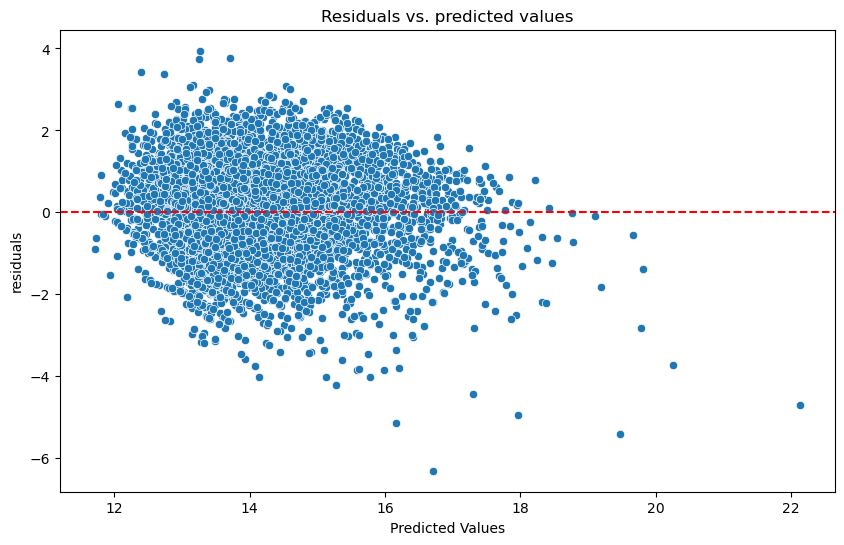

In [20]:
# Lets look at the residuals:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0,color='red',linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('residuals')
plt.title('Residuals vs. predicted values')
plt.show()

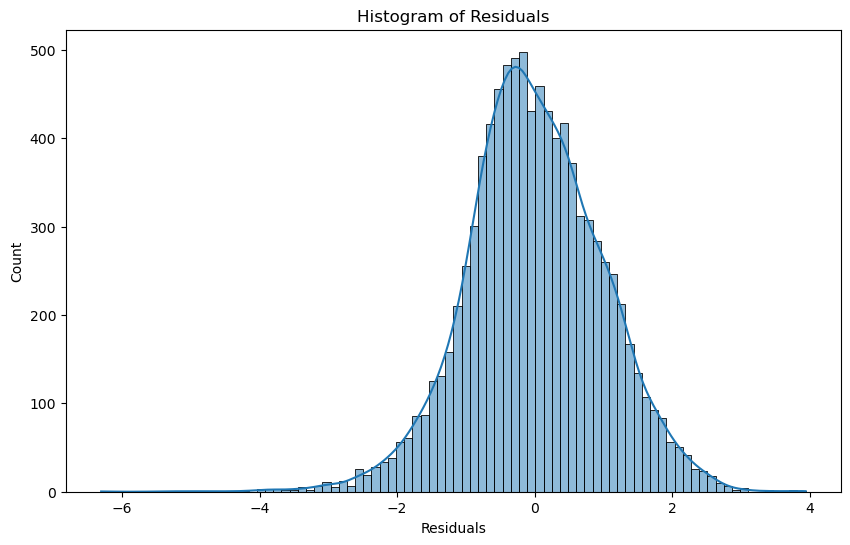

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.show()

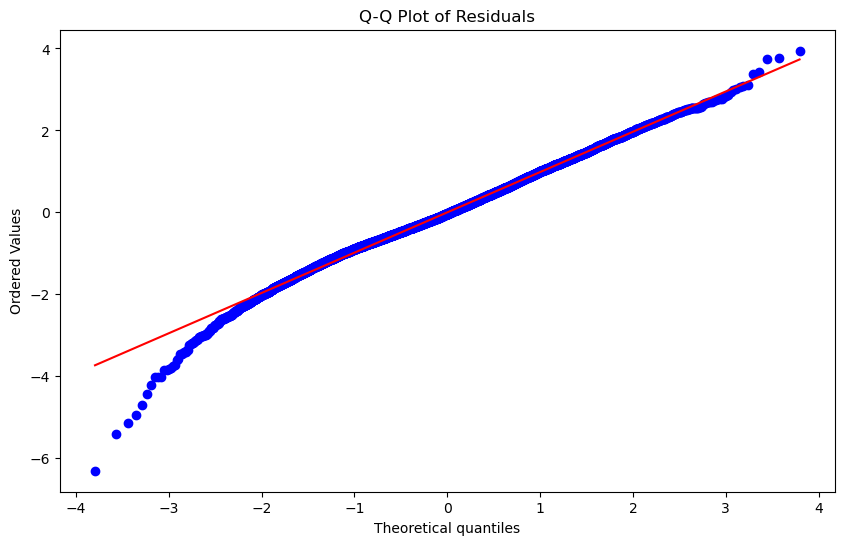

In [22]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

In [23]:
# This is showing that the errors is roughly normally distributed!

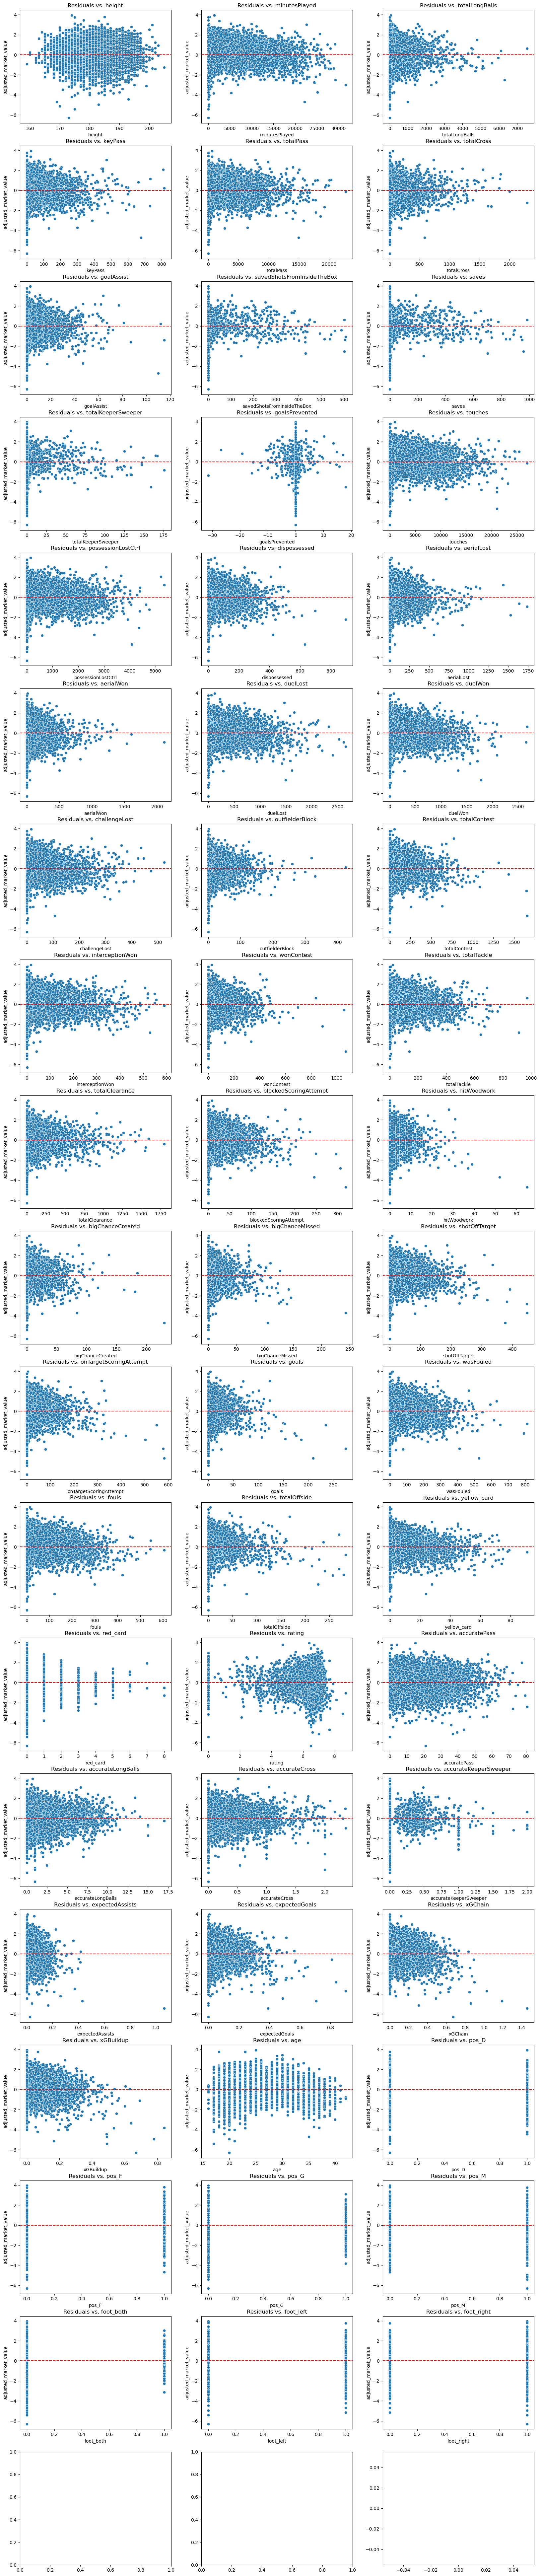

In [24]:
fig,axes = plt.subplots(ncols = 3,nrows=int(len(features)/3)+1,figsize=(20,100))
axes = axes.flatten()
for i, feature in enumerate(X.columns):  
    
    sns.scatterplot(x=X[feature], y=residuals,ax = axes[i])
    axes[i].axhline(0, color='red', linestyle='--')
    #axes[i].xlabel(feature)
    #axes[i].ylabel("Residuals")
    axes[i].set_title(f"Residuals vs. {feature}")
    sns.histplot()
plt.show()

In [25]:
# It does not look like any of the features is not normally distributed around 0 with respect to the residuals.

In [26]:
# Lets build a KNN and see how this does
n_neigh = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,40,45,50,60,70,80,90,100]
knnfold = KFold(n_splits=5)

X = train_drop[features]
y = train_drop[target]

train_mses = np.zeros(shape=(len(n_neigh),5))
test_mses = np.zeros(shape=(len(n_neigh),5))
j = 0
for train_index, ho_index in knnfold.split(train_drop):
    X_train, X_ho = X.iloc[train_index], X.iloc[ho_index]
    y_train, y_ho = y.iloc[train_index], y.iloc[ho_index]

    for i in range(len(n_neigh)):
        pipeline = Pipeline([('scale',StandardScaler()),('knn',KNeighborsRegressor(n_neighbors=n_neigh[i]))])

        pipeline.fit(X_train,y_train)

        y_train_p = pipeline.predict(X_train)
        y_ho_p = pipeline.predict(X_ho)

        train_mses[i][j] = mean_squared_error(y_train,y_train_p)
        test_mses[i][j] = mean_squared_error(y_ho,y_ho_p)
    j+=1

avg_train_mses = np.mean(train_mses,axis=1)
avg_test_mses = np.mean(test_mses,axis=1)
for i in range(len(n_neigh)):
    print(f'KNN with {n_neigh[i]} neighbors')
    print(f'Train MSE mean: {avg_train_mses[i]}')
    print(f'Holdout MSE mean: {avg_test_mses[i]}\n')

KNN with 2 neighbors
Train MSE mean: 0.4107569975044349
Holdout MSE mean: 1.2411467235208586

KNN with 3 neighbors
Train MSE mean: 0.5535262472020999
Holdout MSE mean: 1.1136828498498255

KNN with 4 neighbors
Train MSE mean: 0.6322958113325804
Holdout MSE mean: 1.0594601499975664

KNN with 5 neighbors
Train MSE mean: 0.6819806721720415
Holdout MSE mean: 1.028874906370876

KNN with 6 neighbors
Train MSE mean: 0.7195210713854254
Holdout MSE mean: 1.0111422542280815

KNN with 7 neighbors
Train MSE mean: 0.7465978268706952
Holdout MSE mean: 0.999503802647334

KNN with 8 neighbors
Train MSE mean: 0.7667053489830186
Holdout MSE mean: 0.9865029627928974

KNN with 9 neighbors
Train MSE mean: 0.7840394757716267
Holdout MSE mean: 0.9820396003578917

KNN with 10 neighbors
Train MSE mean: 0.7968842265040481
Holdout MSE mean: 0.978570734556167

KNN with 11 neighbors
Train MSE mean: 0.8099908017356624
Holdout MSE mean: 0.9757458310473334

KNN with 12 neighbors
Train MSE mean: 0.8209546873755412
Hold

In general, KNN does about the same as Linear regression, so no real improvement.  

In [27]:
# Lets use a Decision Tree regressor
# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42)
X = train_drop[features]
y = train_drop[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = DecisionTreeRegressor()

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(y_train,y_train_pred))
    test_mses.append(mean_squared_error(y_val,y_test_pred))

    train_rmses.append(root_mean_squared_error(y_train,y_train_pred))
    test_rmses.append(root_mean_squared_error(y_val,y_test_pred))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')   


MSE for train: mean: 1.7479779212330236e-32 std: 4.578476278730557e-33
MSE for test:  mean: 1.3177152410668136  std: 0.07829049373524295

RMSE for train: mean: 1.3104872139776066e-16 std: 1.749319388626181e-17
RMSE for test: mean: 1.1474100252305817 std: 0.03413905486637389

R^2 for train: mean: 1.0 std: 0.0
R^2 for test: mean: 0.3180888380252856 std: 0.042028055404562836

MAE for train: mean: 9.840240893396124e-18 std: 2.5774530078519488e-18
MAE for test: mean: 0.8874022887959534 std: 0.02776056995448729

MAPE for train: mean: 6.956283141524937e-19 std: 1.888092112038901e-19
MAPE for test: mean: 0.0635216610718081 std: 0.002062265756577511



Decision Tree Regressor overfits really hard.

In [28]:
#Lets try Random Forest Regression to reduce the overfitting
# Lets use a Decision Tree regressor
# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42)
X = train_drop[features]
y = train_drop[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = RandomForestRegressor()

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(y_train,y_train_pred))
    test_mses.append(mean_squared_error(y_val,y_test_pred))

    train_rmses.append(root_mean_squared_error(y_train,y_train_pred))
    test_rmses.append(root_mean_squared_error(y_val,y_test_pred))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')   

MSE for train: mean: 0.0891597836609298 std: 0.0006954925796125548
MSE for test:  mean: 0.6324725437892402  std: 0.039778483333817574

RMSE for train: mean: 0.29859408921259073 std: 0.0011634209183395475
RMSE for test: mean: 0.7948919509464207 std: 0.02488634384221968

R^2 for train: mean: 0.9539561356365838 std: 0.0004029631593062884
R^2 for test: mean: 0.6727007821025726 std: 0.021053336300314793

MAE for train: mean: 0.22939168057177314 std: 0.0006786569640426052
MAE for test: mean: 0.6160745368643973 std: 0.01708569109077178

MAPE for train: mean: 0.016456274553443822 std: 4.9641260434315635e-05
MAPE for test: mean: 0.04418667857681989 std: 0.0012816539608997966



In [29]:
# Lets Try Gradient Boosting Regression
# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42)
X = train_drop[features]
y = train_drop[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = GradientBoostingRegressor()

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(y_train,y_train_pred))
    test_mses.append(mean_squared_error(y_val,y_test_pred))

    train_rmses.append(root_mean_squared_error(y_train,y_train_pred))
    test_rmses.append(root_mean_squared_error(y_val,y_test_pred))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')   

MSE for train: mean: 0.5647400655878225 std: 0.005293661439397783
MSE for test:  mean: 0.6388729966122784  std: 0.04280636963252555

RMSE for train: mean: 0.7514836379690139 std: 0.0035224214226360485
RMSE for test: mean: 0.7988617246351707 std: 0.026323782501746527

R^2 for train: mean: 0.7083604845564722 std: 0.0026170019042959466
R^2 for test: mean: 0.6694984893869945 std: 0.020643880918461765

MAE for train: mean: 0.5830776867287504 std: 0.0022552150894898358
MAE for test: mean: 0.6201058728973757 std: 0.01752839575133635

MAPE for train: mean: 0.041922390794646325 std: 0.00017566445645784975
MAPE for test: mean: 0.044508334699246525 std: 0.0013477157346783912



In [30]:
# Lets do a Support Vector Regression (SVR)

# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42)
X = train_drop[features]
y = train_drop[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = SVR()

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(y_train,y_train_pred))
    test_mses.append(mean_squared_error(y_val,y_test_pred))

    train_rmses.append(root_mean_squared_error(y_train,y_train_pred))
    test_rmses.append(root_mean_squared_error(y_val,y_test_pred))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')   

MSE for train: mean: 1.28560725027758 std: 0.008186940842629312
MSE for test:  mean: 1.298863235842666  std: 0.07345166973787004

RMSE for train: mean: 1.133840458489815 std: 0.003614549651889491
RMSE for test: mean: 1.139231131510313 std: 0.031869497021416025

R^2 for train: mean: 0.3360967705940423 std: 0.003464241236747851
R^2 for test: mean: 0.32833344893670346 std: 0.029441843644346176

MAE for train: mean: 0.8989366728169564 std: 0.002371720319178201
MAE for test: mean: 0.9047031368486774 std: 0.02072686322611856

MAPE for train: mean: 0.06382013099557557 std: 0.00017731456687234177
MAPE for test: mean: 0.06420780442233336 std: 0.001576372019770088



In [31]:
# Finally, lets try XGBoost
# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42)
X = train_drop[features]
y = train_drop[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = XGBRegressor()

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(y_train,y_train_pred))
    test_mses.append(mean_squared_error(y_val,y_test_pred))

    train_rmses.append(root_mean_squared_error(y_train,y_train_pred))
    test_rmses.append(root_mean_squared_error(y_val,y_test_pred))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')   

MSE for train: mean: 0.14456600868375577 std: 0.004176644637590458
MSE for test:  mean: 0.664045921251129  std: 0.03777849109539688

RMSE for train: mean: 0.38017843957219144 std: 0.005510242118939183
RMSE for test: mean: 0.814565675785226 std: 0.022993065991451747

R^2 for train: mean: 0.9253471599657594 std: 0.0020422079633273782
R^2 for test: mean: 0.6564842091751156 std: 0.017842642839934905

MAE for train: mean: 0.28186313446472083 std: 0.0029616217178471847
MAE for test: mean: 0.6284721409319765 std: 0.018453865513827612

MAPE for train: mean: 0.020429553965266085 std: 0.0002174098256460193
MAPE for test: mean: 0.045129985840335854 std: 0.001385546422220826



## Conclusion with these types of models
For our baseline Linear regression, which does really well, but we have that XGBoost does the best in terms of RMSE but it does have a lot more variance, so if we are maybe able to reduce the variance, then we can get a better performance. On the other hand, Gradient Boosting regression just does better then Linear regression  

In [32]:
# Next, lets do some testing with the features that are not linear with the target variable and see what we can do
train_x = train_drop.copy()
train_x['squared_root_age'] = np.sqrt(train_x['age'])

train_x['squared_age'] = np.pow(train_x['age'],2)
train_x['squared_root_height'] = np.sqrt(train_x['height'])

In [68]:
features_x = ['height', 'minutesPlayed', 'totalLongBalls', 'keyPass',
       'totalPass', 'totalCross', 'goalAssist', 'savedShotsFromInsideTheBox',
       'saves', 'totalKeeperSweeper', 'goalsPrevented', 'touches',
       'possessionLostCtrl', 'dispossessed', 'aerialLost', 'aerialWon',
       'duelLost', 'duelWon', 'challengeLost', 'outfielderBlock',
       'totalContest', 'interceptionWon', 'wonContest', 'totalTackle',
       'totalClearance', 'blockedScoringAttempt', 'hitWoodwork',
       'bigChanceCreated', 'bigChanceMissed', 'shotOffTarget',
       'onTargetScoringAttempt', 'goals', 'wasFouled', 'fouls', 'totalOffside',
       'yellow_card', 'red_card', 'rating', 'accuratePass',
       'accurateLongBalls', 'accurateCross', 'accurateKeeperSweeper',
       'expectedAssists', 'expectedGoals', 'xGChain', 'xGBuildup','age','squared_root_age',
       'pos_D', 'pos_F', 'pos_G', 'pos_M', 'foot_both', 'foot_left',
       'foot_right']
target = 'adjusted_market_value'

features_x_sign = ['height', 'minutesPlayed', 'totalLongBalls', 'keyPass', 'totalPass',
       'totalCross', 'totalKeeperSweeper', 'touches', 'possessionLostCtrl',
       'dispossessed', 'aerialLost', 'aerialWon', 'duelLost', 'duelWon',
       'challengeLost', 'outfielderBlock', 'interceptionWon', 'wonContest',
       'totalTackle', 'blockedScoringAttempt', 'hitWoodwork',
       'bigChanceMissed', 'wasFouled', 'totalOffside', 'accuratePass',
       'accurateLongBalls', 'accurateCross', 'expectedAssists',
       'expectedGoals', 'xGBuildup', 'age','squared_root_age', 'pos_D', 'pos_F', 'pos_G', 'pos_M',
       'foot_both', 'foot_left', 'foot_right']



In [45]:
def scale_back(x):
    return np.exp(x) - 1

In [69]:
# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42,)
X = train_x[features_x]
y = train_x[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = LinearRegression()

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(scale_back(y_train),scale_back(y_train_pred)))
    test_mses.append(mean_squared_error(scale_back(y_val),scale_back(y_test_pred)))

    train_rmses.append(root_mean_squared_error(scale_back(y_train),scale_back(y_train_pred)))
    test_rmses.append(root_mean_squared_error(scale_back(y_val),scale_back(y_test_pred)))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')

MSE for train: mean: 791594568710556.0 std: 265403593639533.62
MSE for test:  mean: 2.8150336018914184e+16  std: 8.402610349090458e+16

RMSE for train: mean: 27585086.0057304 std: 5536930.446286344
RMSE for test: mean: 62759751.052079335 std: 155600609.46794268

R^2 for train: mean: 0.5474467688377386 std: 0.0031434680383569153
R^2 for test: mean: 0.5377867434967922 std: 0.029746439049223063

MAE for train: mean: 0.7303626847448328 std: 0.002209269518820749
MAE for test: mean: 0.7359830597739636 std: 0.018832207581495283

MAPE for train: mean: 0.052430114053182986 std: 0.00017509423145433095
MAPE for test: mean: 0.05281616922811132 std: 0.001479791714069424



In [71]:
# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42,)
X = train_x[features_x]
y = train_x[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = Pipeline([('scale',StandardScaler()),('ridge',Lasso())])

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(scale_back(y_train),scale_back(y_train_pred)))
    test_mses.append(mean_squared_error(scale_back(y_val),scale_back(y_test_pred)))

    train_rmses.append(root_mean_squared_error(scale_back(y_train),scale_back(y_train_pred)))
    test_rmses.append(root_mean_squared_error(scale_back(y_val),scale_back(y_test_pred)))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')

MSE for train: mean: 90911516977046.12 std: 2903285509213.1704
MSE for test:  mean: 90911434102443.42  std: 26379256720501.816

RMSE for train: mean: 9533534.739162443 std: 152421.6330740789
RMSE for test: mean: 9427564.754063157 std: 1425642.6306720402

R^2 for train: mean: 0.0 std: 0.0
R^2 for test: mean: -0.0015352803532839633 std: 0.002499308752458412

MAE for train: mean: 1.108441135470317 std: 0.002591382072939238
MAE for test: mean: 1.108554940297475 std: 0.021375443419925467

MAPE for train: mean: 0.07906009060754703 std: 0.00017082181972296562
MAPE for test: mean: 0.07906854831880969 std: 0.0015352060645572856



In [47]:
# Lets Try Gradient Boosting Regression
# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42)
X = train_x[features_x]
y = train_x[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = GradientBoostingRegressor()

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(y_train,y_train_pred))
    test_mses.append(mean_squared_error(y_val,y_test_pred))

    train_rmses.append(root_mean_squared_error(scale_back(y_train),scale_back(y_train_pred)))
    test_rmses.append(root_mean_squared_error(scale_back(y_val),scale_back(y_test_pred)))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')   

KeyboardInterrupt: 